In [2]:
import numpy as np
import math
from graphviz import Digraph

In [3]:
class tensor:
    def __init__(self,data,children=(),arithmetic=''):
        self.data = data
        self.children = set(children)
        self.arithmetic = arithmetic
        self.gradient = 0
        self.back_prop = lambda:None
        
    def __add__(self,other):
        other = other if isinstance(other,tensor) else tensor(other)
        _output = tensor(self.data+other.data,(self,other),'+')
        
        def back_prop():
            self.gradient = 1.0*_output.gradient
            other.gradient = 1.0*_output.gradient
            
        _output.back_prop = back_prop()       
        return _output
    
    def __radd__(self,other):
        return self+other
    
    def __sub__(self,other):
        return self + (-other)
    
    def __mul__(self,other):
        other = other if isinstance(other,tensor) else tensor(other)
        _output = tensor(self.data*other.data,(self,other),'*')
        
        def back_prop():
            self.gradient = other.data*_output.gradient
            other.gradient = self.data*_output.gradient
            
        _output.back_prop = back_prop      
        return _output
    
    def __rmul__(self,other):
        return self*other
    
    def sigmoid(self):
        return tensor(np.sigmoid(self.data),(self),'Sigmoid')
    
    def tanh(self):
        val = self.data
        exp = math.exp(2*val)
        return tensor(exp-1)/(exp+1)
        
        
        

In [5]:
a = tensor(3)
b = tensor(4)
c = a+b
c

In [4]:
def draw(root):
    nodes,edges = set(),set()
       
    def get_nodes_and_edges(root):
        nodes.add(root)
        for _child in root.children:
            nodes.add(_child)
            edges.add((_child,root))
            get_nodes_and_edges(_child)
        return nodes,edges
    
    _nodes,_edges = get_nodes_and_edges(root)
    
    
    graph = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    for _node in _nodes:
        unique_id = str(id(_node))
        graph.node(name = unique_id,label = 'data: '+str(_node.data)+' gradient: '+str(_node.gradient))
        
        if len(_node.arithmetic)>0:
            graph.node(name = unique_id+_node.arithmetic,label = _node.arithmetic)
            graph.edge(unique_id+_node.arithmetic,unique_id)
            
    for _node1,_node2 in _edges:
        graph.edge(str(id(_node1)),str(id(_node2))+_node2.arithmetic)
        
    return graph



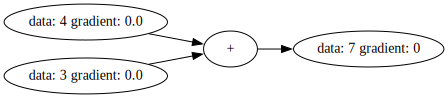

In [6]:
draw(c)